In [1]:
import keras
from keras.datasets import mnist
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.compat.v1.keras.optimizers import RMSprop

In [2]:
#Carregando treino e teste
#função possui parentes

(x_treino, y_treino),(x_teste, y_teste) = mnist.load_data()

In [3]:
#how many images I have for train?
print("img for train",len(x_treino))
#how many image for test?
print("img for test", len(x_teste))
#who type x_treino?
print("Tipo do x_treino", type(x_treino))
#get first image
primeira_imagem = x_treino[0]
print(primeira_imagem) 



img for train 60000
img for test 10000
Tipo do x_treino <class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0  

<function matplotlib.pyplot.show>

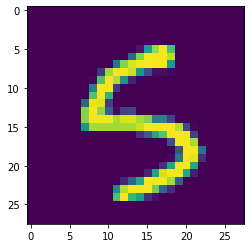

In [4]:
import matplotlib.pyplot as plt

indice = 15000

plt.imshow(x_treino[indice])
plt.show

In [5]:
#achatando matrizes de pixel e transformando em uma unica lista com valores entre 0 e 1
quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)


In [6]:
#normalização dos dados
#255 vira 1
# 0 vira 0
#assim por diante


x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

           
print(type(x_treino[0][350]))
print(x_treino[0][350])


<class 'numpy.float32'>
0.27450982


In [7]:
#dados normalizados

print("Dados normalizados", x_treino[0])



Dados normalizados [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [8]:
#camada de saida

valores_unicos = set(y_treino)
quantidade_valores_unicos = len(valores_unicos)
print(valores_unicos)

#transformação dos valores unicos em variaveis categoricas

#representação categorica de um numero em uma rede neural
# numero 0 -> [1,0,0,0,0,0,0,0,0,0]
#...
#numero 9 - > [0,0,0,0,0,0,0,0, 9]

print("y_treino[0 antes", y_treino[0] )
y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois", y_treino[0])

#executa apenas 1 vez ou pode quebrar todo código

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_treino[0 antes 5
y_treino[0] depois [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#criando modelo de rede neural

model = Sequential()

#primeira hidden layer com 30 neuronios e função de ativação ReLu
#Na camada 1 , informamos input shape, que é (784,) , ela é uma tupla, entao virgula é essencial


model.add(Dense(450, activation='relu', input_shape=(resolucao_total, )))

#adicionando dropout pra evitar overfit

model.add(Dropout(0.2))

#segunda hidden layer , essa tem pedaços maiores, entao sera cada uma com 20 neutonios + relu
model.add(Dense(300, activation='relu'))

#mais um regularizador apos a 2 hidden

model.add(Dropout(0.2))

#finalizamos com camada de saida, output , informando valores unicos

model.add(Dense(quantidade_valores_unicos, activation='softmax'))

#exibe modelo criado

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 450)               353250    
_________________________________________________________________
dropout (Dropout)            (None, 450)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               135300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 491,560
Trainable params: 491,560
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [11]:
#Treinar o modelo

history = model.fit(x_treino,y_treino,
                    batch_size=128,
                    epochs=20
                    ,verbose=1
                    ,validation_data= (x_teste, y_teste))

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2593 - accuracy: 0.9213 - val_loss: 0.1010 - val_accuracy: 0.9665
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1104 - accuracy: 0.9665 - val_loss: 0.0933 - val_accuracy: 0.9722
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0818 - accuracy: 0.9750 - val_loss: 0.0765 - val_accuracy: 0.9766
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.0769 - val_accuracy: 0.9787
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.0731 - val_accuracy: 0.9815
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 0.0757 - val_accuracy: 0.9811
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0705 - val_accuracy: 0.9832

Valor categorico em y_teste[indice] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão : [[9.99999762e-01 1.31838865e-20 2.93370590e-07 2.92347594e-14
  4.69476058e-16 1.13443517e-11 4.15037671e-10 3.80963987e-17
  5.17085841e-09 1.99367278e-09]]
Previsão ajustada [0]


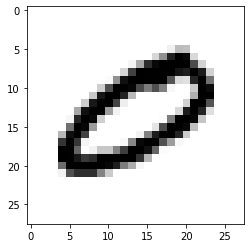

In [12]:
#Fazendo nossas previsoes

indice = 9800


#Qual valor categorico de y_test[indice]

print("Valor categorico em y_teste[indice]", y_teste[indice])

#parece ser 7

#print(x_teste[indice])
imagem = x_teste[indice].reshape((1, resolucao_total))

#print(imagem)

#fazendo previsao

prediction = model.predict(imagem)
print("Previsão :", prediction)

#prediction_class = model.predict_classes(imagem)

import numpy as np

prediction_class = np.argmax(model.predict(imagem), axis= -1)

print("Previsão ajustada", prediction_class)

(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)

digite um valor entre 0 e 10000
9999
Valor categorico em y_teste[indice] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão : [[5.1815373e-26 3.7239291e-34 9.5231499e-33 1.3390666e-31 1.3930433e-28
  3.4843845e-22 1.0000000e+00 0.0000000e+00 5.8549348e-29 1.4875729e-27]]
Previsão ajustada [6]


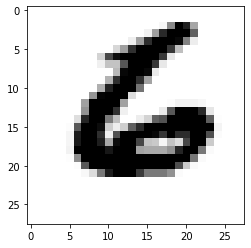

digite um valor entre 0 e 10000
6980
Valor categorico em y_teste[indice] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Previsão : [[2.01948288e-17 3.12034188e-12 4.43200969e-15 1.79748505e-09
  3.03944574e-07 1.24856184e-11 1.23654761e-20 1.75322352e-08
  5.12810128e-10 9.99999642e-01]]
Previsão ajustada [9]


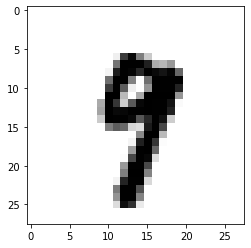

digite um valor entre 0 e 10000
1209
Valor categorico em y_teste[indice] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão : [[3.8078953e-18 6.3399996e-10 2.9543826e-16 1.7049219e-16 5.2022128e-19
  7.6102529e-09 1.0000000e+00 8.3996647e-25 7.6632689e-10 1.2530175e-24]]
Previsão ajustada [6]


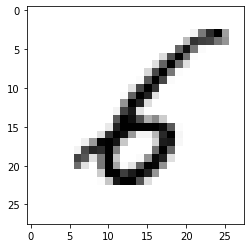

digite um valor entre 0 e 10000
790
Valor categorico em y_teste[indice] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão : [[3.8837383e-19 1.0000000e+00 1.5616824e-13 1.2368112e-14 9.6934995e-12
  5.5195033e-12 5.4602402e-11 3.1396215e-11 5.9084138e-10 1.2807198e-13]]
Previsão ajustada [1]


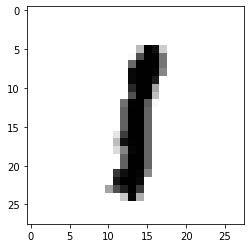

digite um valor entre 0 e 10000
1
Valor categorico em y_teste[indice] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Previsão : [[1.5072034e-37 5.5830974e-19 1.0000000e+00 3.3889234e-23 0.0000000e+00
  5.2313768e-38 1.0765007e-37 0.0000000e+00 9.9725185e-34 0.0000000e+00]]
Previsão ajustada [2]


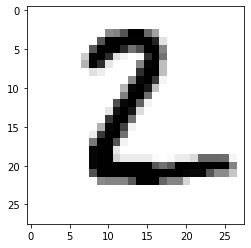

digite um valor entre 0 e 10000
239
Valor categorico em y_teste[indice] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão : [[4.3323950e-25 1.0000000e+00 4.0829915e-15 1.6740399e-15 6.1552229e-11
  1.0335571e-12 4.1608559e-14 2.0839636e-12 9.0611613e-10 3.7593659e-13]]
Previsão ajustada [1]


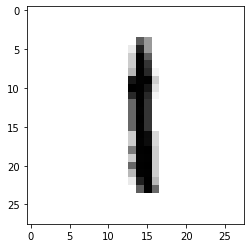

digite um valor entre 0 e 10000
870
Valor categorico em y_teste[indice] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão : [[6.7653067e-16 4.1140353e-18 1.5894991e-19 2.1013849e-21 1.3711057e-21
  1.3632577e-08 1.0000000e+00 7.1396704e-25 4.5453836e-12 1.6344116e-16]]
Previsão ajustada [6]


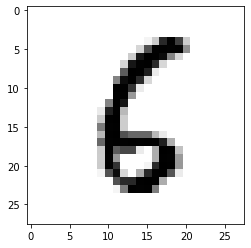

digite um valor entre 0 e 10000
589
Valor categorico em y_teste[indice] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Previsão : [[2.0509948e-26 7.3067786e-14 7.0795450e-17 6.7755980e-20 1.0000000e+00
  1.7355817e-14 6.6564381e-22 1.4074491e-13 4.2015096e-15 5.0697649e-12]]
Previsão ajustada [4]


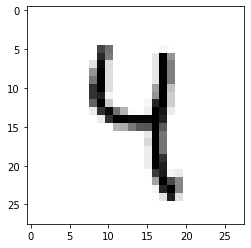

digite um valor entre 0 e 10000
98
Valor categorico em y_teste[indice] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão : [[1.6555011e-13 8.9568608e-25 3.3460108e-20 1.1315706e-25 2.4377978e-21
  5.6716199e-13 1.0000000e+00 4.1477316e-23 2.9908341e-19 6.4887646e-21]]
Previsão ajustada [6]


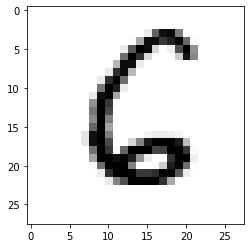

digite um valor entre 0 e 10000
348
Valor categorico em y_teste[indice] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão : [[1.8925474e-16 1.0000000e+00 2.0453497e-11 3.8725173e-15 1.6499194e-12
  2.2394872e-13 6.2474035e-09 4.0654296e-11 4.0819366e-09 4.0889004e-14]]
Previsão ajustada [1]


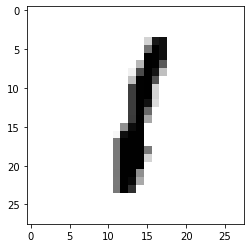

digite um valor entre 0 e 10000
21
Valor categorico em y_teste[indice] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Previsão : [[1.0630494e-16 3.2892808e-25 6.5203708e-23 5.6378868e-19 2.4484502e-21
  1.5361372e-09 1.0000000e+00 4.7138858e-26 1.0730767e-15 1.2652290e-21]]
Previsão ajustada [6]


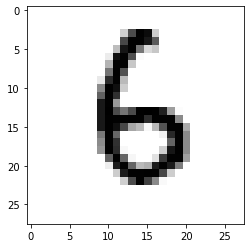

digite um valor entre 0 e 10000
89
Valor categorico em y_teste[indice] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão : [[3.6761561e-16 9.9999964e-01 1.4507354e-10 5.0388067e-09 1.8077662e-08
  5.5872802e-12 1.5313821e-10 6.6146248e-09 3.3517867e-07 3.5961319e-12]]
Previsão ajustada [1]


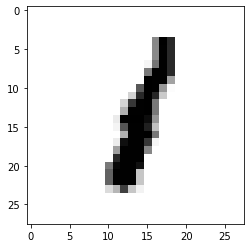

digite um valor entre 0 e 10000
58
Valor categorico em y_teste[indice] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Previsão : [[3.2625406e-31 1.6643386e-27 1.1041299e-20 1.7486994e-15 4.6403456e-10
  3.6281664e-14 2.9047829e-34 2.5999263e-14 1.1999175e-19 1.0000000e+00]]
Previsão ajustada [9]


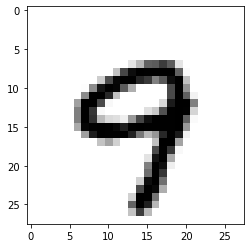

digite um valor entre 0 e 10000
44
Valor categorico em y_teste[indice] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Previsão : [[0.0000000e+00 3.4823813e-20 6.1087458e-18 1.0000000e+00 2.6823819e-24
  8.6141954e-16 1.1364857e-31 1.5070531e-23 2.1774712e-22 1.0085856e-22]]
Previsão ajustada [3]


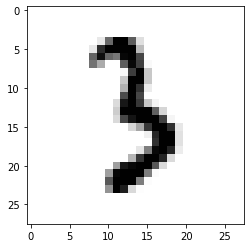

digite um valor entre 0 e 10000
30
Valor categorico em y_teste[indice] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Previsão : [[0.0000000e+00 4.7236148e-30 6.3404529e-31 1.0000000e+00 3.2393189e-35
  9.4644020e-19 0.0000000e+00 6.1454603e-27 7.6358790e-26 1.3182142e-18]]
Previsão ajustada [3]


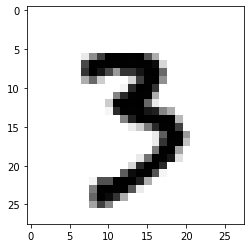

digite um valor entre 0 e 10000
3333
Valor categorico em y_teste[indice] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Previsão : [[4.1037450e-23 2.7584713e-13 7.0659985e-11 1.6499346e-06 4.2642932e-14
  6.6994906e-15 3.4311702e-26 9.9999666e-01 3.9652001e-15 1.6401091e-06]]
Previsão ajustada [7]


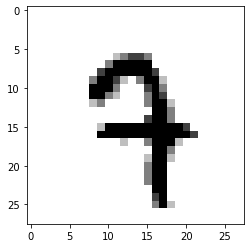

digite um valor entre 0 e 10000
-1


In [13]:
#Fazendo nossas previsoes

while True:
  print("digite um valor entre 0 e 10000")
  indice = int(input())

  if indice == -1:
    break

    
  #Qual valor categorico de y_test[indice]

  print("Valor categorico em y_teste[indice]", y_teste[indice])

  #print(x_teste[indice])
  imagem = x_teste[indice].reshape((1, resolucao_total))

  #print(imagem)

  #fazendo previsao

  prediction = model.predict(imagem)
  print("Previsão :", prediction)

  #prediction_class = model.predict_classes(imagem)

  import numpy as np

  prediction_class = np.argmax(model.predict(imagem), axis= -1)

  print("Previsão ajustada", prediction_class)

  (x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
  plt.imshow(x_teste_img[indice],  cmap=plt.cm.binary)
  plt.show()